In [3]:
#initialization
import matplotlib.pyplot as plt
import numpy as np
import math

# importing Qiskit
from qiskit import IBMQ, Aer, transpile, execute
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.providers.ibmq import least_busy

# import basic plot tools
from qiskit.visualization import plot_histogram

In [4]:
grover_circuit = QuantumCircuit(2)

In [5]:
def initialize_s(qc, qubits):
    """Apply a H-gate to 'qubits' in qc"""
    for q in qubits:
        qc.h(q)
    return qc

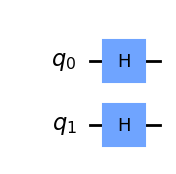

In [6]:
grover_circuit = initialize_s(grover_circuit, [0,1])
grover_circuit.draw()

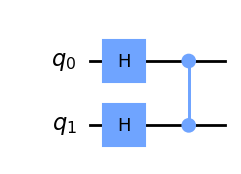

In [7]:
grover_circuit.cz(0,1)
grover_circuit.draw()

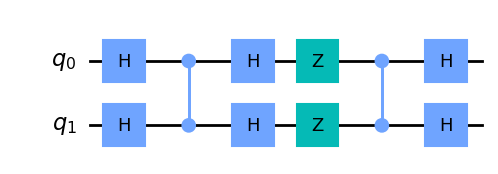

In [8]:
grover_circuit.h([0,1])
grover_circuit.z([0,1])
grover_circuit.cz(0,1)
grover_circuit.h([0,1])
grover_circuit.draw()

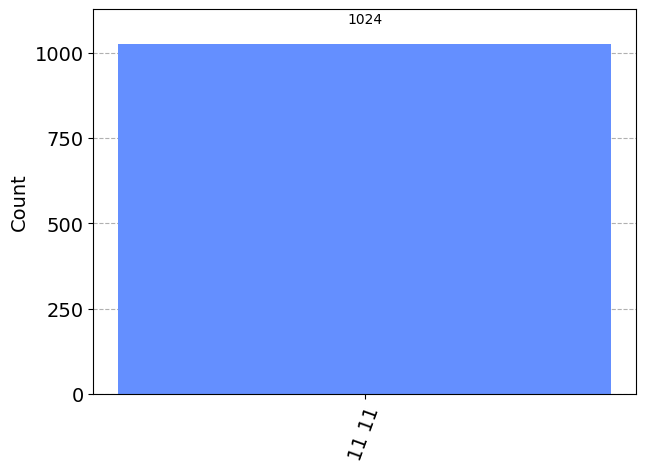

In [11]:
grover_circuit.measure_all()

qasm_sim = Aer.get_backend('qasm_simulator')
result = qasm_sim.run(grover_circuit).result()
counts = result.get_counts()
plot_histogram(counts)

In [12]:
from qiskit.providers.ibmq import least_busy
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= 2 and
not x.configuration().simulator and x.status().operational==True)) # Find the least busy QC
print(backend)

job = execute(grover_circuit,backend, shots = 1024) # Put in the name of your quantum circuit where it says qc, and the number of shots you want to use
result = job.result()

ibm_nairobi
